**Importing Libraries**

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [65]:
dataset = pd.read_csv('admission.csv')

In [66]:
# Convert "Chance of Admit" to classification labels (0 = Not Admit, 1 = Admit)
dataset["Chance of Admit"] = (dataset["Chance of Admit"] >= 0.75).astype(int)

In [67]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [68]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.436000
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.496384
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.000000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.000000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


In [69]:
dataset.isnull().count()

Serial No.           500
GRE Score            500
TOEFL Score          500
University Rating    500
SOP                  500
LOR                  500
CGPA                 500
Research             500
Chance of Admit      500
dtype: int64

In [70]:
dataset.fillna(dataset.median(), inplace=True)  # Fill missing values with median

In [71]:
print("Missing values after cleaning:\n", dataset.isnull().sum())

Missing values after cleaning:
 Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [72]:
dataset.drop_duplicates(inplace=True)

In [ ]:
# Detect and Remove Outliers
# Using IQR (Interquartile Range) method``
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

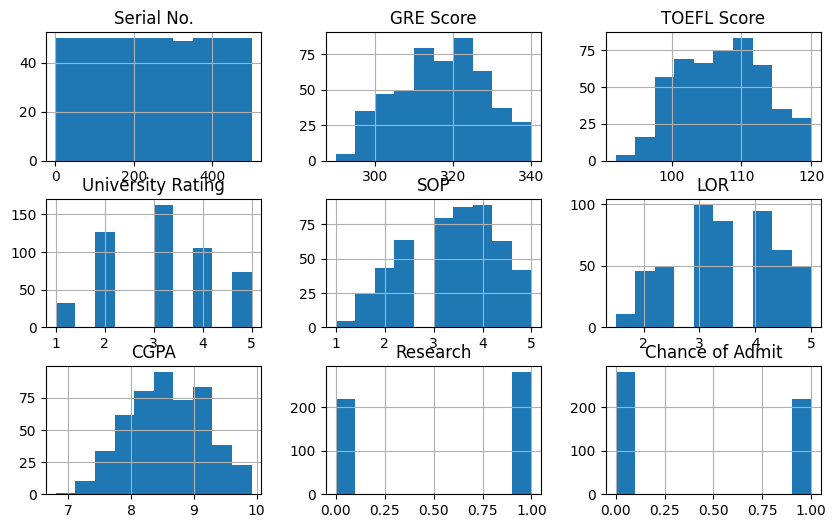

In [74]:
dataset.hist(figsize=(10,6))
plt.show()

In [75]:
# Handle missing values
dataset.fillna(dataset.median(), inplace=True)

In [76]:
X=dataset.drop(columns=["Chance of Admit"]) #Input features
y=dataset["Chance of Admit"] #Target Variable

In [77]:
#splitted data into 80% for training and 20% for testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
#Training machine learning model
model=RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [79]:
# Make predictions
y_pred = model.predict(X_test)

In [80]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9
